In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [143]:
# Load data from CSV file
df = pd.read_csv('crypto_data_13_november.csv')

In [144]:
# Convert 'Date' column to datetime
try:
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
except ValueError:
    df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [145]:
# Set 'Date' column as index
df.set_index('Date', inplace=True)

In [147]:
# Load saved ARIMA model
with open('crypto_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [148]:
# Make predictions on test data
start_index = 0
end_index = len(df_test) - 1
forecast = model.predict(start=start_index, end=end_index, typ='levels')

In [149]:
#predicted value of Close(BTC)
print(forecast)

2017-11-09        0.000000
2017-11-10     7045.619589
2017-11-11     6645.747076
2017-11-12     6384.438695
2017-11-13     6138.567557
                  ...     
2022-11-05    38590.296289
2022-11-06    38590.296289
2022-11-07    38590.296289
2022-11-08    38590.296289
2022-11-09    38590.296289
Freq: D, Name: predicted_mean, Length: 1827, dtype: float64


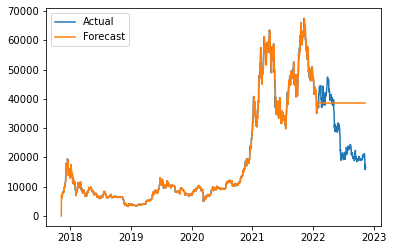

In [150]:
# Plot actual and predicted values
plt.plot(df_test['Close (BTC)'], label='Actual')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()